### 5.1 Show that you understand the BLAST+ package (2 points)
The BLAST+ package contains five core blast search programs.

------------------
1. List all five core blast search programs.

- BLASTN  : database = nucleotide, query = nucleotide
- BLASTP  : database = protein, query = protein
- BLASTX  : database = protein, query = nucleotide translated to protein
- TBLASTN : database = nucleotide translated to protein, query = protein
- TBLASTX : database = nucleotide translated to protein, query = nucleotide translated to protein

source:
(blast-list)[https://doctorlib.info/medical/blast/6.html#:~:text=The%20five%20traditional%20BLAST%20programs,see%20Table%205%2D1)]

------------------
2. Explain the difference between blastn and blastp

blastn is for using blast within nucleotide sequences, where query and db are both nucleotide sequences

blastp is for searching within protein sequences, where query and db are both protein sequences



### 5.2 Show that you understand the biological experiment and data (2 points)
Write a short paragraph in your own words to explain the biological experiment that was done to generate the sequence data (see the publication), what sequences are contained in the  PacBio_VSG_filtered_reads_sample_name.fasta files, and what sequences are
contained in the TREU927-v26_VSGTranscripts database.

Answer the following question: What is the number of sequences in your input file? Hint:
Most popular programming languages have packages that can parse FASTA files automatically

**5.2 Paragraph answer:**

Using mice that were infected with *Trypanosoma brucei*, PacBio long-read-sequencing was done on VSG amplicons that were extraced from mice at 3,6,19 and 12 days after infection. 

PacBio_VSG_filtered_reads_sample_name.fasta contains the dna sequences of VGS's found in a mice at a specfic time. 

The TREU927-v26_VSGTranscripts database contains a database of known VGS dna sequences.



**5.2 seq num answer** number of sequences in file = 19240
See code below for parsing



In [1]:
import pyfastx
from pathlib import Path
pwd = Path().absolute()

In [2]:
directory = f"{str(pwd)}/data/PacBio_VSG_filtered_reads_balbc_10_5.fasta"
fa = pyfastx.Fasta(directory)
print(fa)

<Fasta> /home/henrik/BINF200_H23/assignments/data/PacBio_VSG_filtered_reads_balbc_10_5.fasta contains 19240 sequences


### 5.3 BLAST the sample sequences against the reference VSG database (4
points)

Blast sample sequences against reference vsg database
PacBio_VSG_filtered_reads_balbc_10_5

1. Change the input file name to your assigned sample file (see Table 1).
2. Change the output file name to something containing your sample label (see Table 1).
-----------------------------------
3. What does the paramater -max_target_seq do and why was it set to 1?

This makes it so the best hit comes up "or atleast the first hit with an e-value better than the cutoff" (link to quote)[https://sites.google.com/view/terrimporter/posts/misunderstanding-of-blast-max_target_seqs-setting]

We want the best hit to come up, and having multiple good hits could be fun, in our case it is not needed.

-----------------------------------
Blast command used to do the general file


*Command from repo*
```
blastn -query data/PacBio_VSG_filtered_reads_balbc_10_5.fasta -db data/TREU927-v26_VSGTranscripts/TREU927-v26_VSGTranscripts.fasta -out outdata/PacBio_VSG_filtered_reads_balbc_10_5_outfmt6.txt -max_target_seqs 1 -outfmt '6 qseqid sseqid qseq sseq qlen slen qstart qend sstart send evalue bitscore score length nident mismatch positive gapopen gaps ppos'
```

4.

*Command with updated flags to match question 4*

```
blastn -query data/PacBio_VSG_filtered_reads_balbc_10_5.fasta -db data/TREU927-v26_VSGTranscripts/TREU927-v26_VSGTranscripts.fasta -out outdata/PacBio_VSG_filtered_reads_balbc_10_5_outfmt6.txt -max_target_seqs 1 -outfmt '6 qseqid sseqid score bitscore evalue qlen slen length sstart send nident mismatch gaps positive'
```

In [3]:
#Have a look at the data

import pandas as pd
import numpy as np

df = pd.read_csv(f"{str(pwd)}/outdata/PacBio_VSG_filtered_reads_balbc_10_5_outfmt6.txt", sep="	", header=None)
print(df)

                            0              1     2       3    4     5     6   \
0           balbc_10_5/52/ccs6  Tb08.27P2.380   766  1415.0  0.0  1724  1551   
1           balbc_10_5/67/ccs2  Tb08.27P2.380   783  1447.0  0.0  1787  1551   
2           balbc_10_5/85/ccs8  Tb08.27P2.380   819  1513.0  0.0  1759  1551   
3           balbc_10_5/92/ccs5  Tb08.27P2.380   766  1415.0  0.0  1794  1551   
4           balbc_10_5/99/ccs3   Tb09.v4.0077  1301  2403.0  0.0  1618  1470   
...                        ...            ...   ...     ...  ...   ...   ...   
19285  balbc_10_5/163001/ccs16   Tb09.v4.0088  1314  2427.0  0.0  1469  1317   
19286   balbc_10_5/163150/ccs5    Tb927.10.10  1345  2484.0  0.0  1475  1377   
19287   balbc_10_5/163290/ccs7  Tb08.27P2.380   798  1474.0  0.0  1745  1551   
19288   balbc_10_5/163466/ccs5   Tb09.v4.0088  1284  2372.0  0.0  1447  1317   
19289   balbc_10_5/163473/ccs2   Tb10.v4.0065  1295  2392.0  0.0  1731  1500   

         7   8     9     10   11  12   

### 5.4 1. What is the number of sequences in your blast output file? Is it the same as in the input file? Hint: Import the BLAST output file into a DataFrame.

One can see from the `print(df)` that there are 19290 rows,
the input file has 19240 sequences, while the output file has 19290 sequences, so a an increase in 50 lines. 

In [4]:
### 5.4 2. We define the alignment coverage as the percentage of the subject sequence covered
# by the alignment. Compute the alignment coverage for all sequences from the BLAST
# output.

df['coverage'] = np.divide(df[7],df[6])*100

print("Coverage is now a col in the df")
print(df)


Coverage is now a col in the df
                             0              1     2       3    4     5     6  \
0           balbc_10_5/52/ccs6  Tb08.27P2.380   766  1415.0  0.0  1724  1551   
1           balbc_10_5/67/ccs2  Tb08.27P2.380   783  1447.0  0.0  1787  1551   
2           balbc_10_5/85/ccs8  Tb08.27P2.380   819  1513.0  0.0  1759  1551   
3           balbc_10_5/92/ccs5  Tb08.27P2.380   766  1415.0  0.0  1794  1551   
4           balbc_10_5/99/ccs3   Tb09.v4.0077  1301  2403.0  0.0  1618  1470   
...                        ...            ...   ...     ...  ...   ...   ...   
19285  balbc_10_5/163001/ccs16   Tb09.v4.0088  1314  2427.0  0.0  1469  1317   
19286   balbc_10_5/163150/ccs5    Tb927.10.10  1345  2484.0  0.0  1475  1377   
19287   balbc_10_5/163290/ccs7  Tb08.27P2.380   798  1474.0  0.0  1745  1551   
19288   balbc_10_5/163466/ccs5   Tb09.v4.0088  1284  2372.0  0.0  1447  1317   
19289   balbc_10_5/163473/ccs2   Tb10.v4.0065  1295  2392.0  0.0  1731  1500   

       

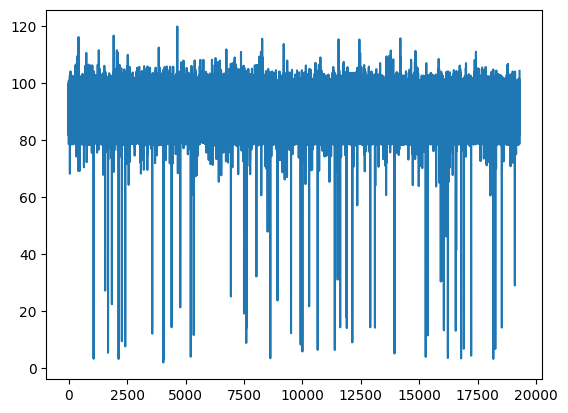

In [5]:
### 5.4 3. Visualize the distribution of alignment coverages as a histogram
import matplotlib.pyplot as plt

plt.plot(df.index,df["coverage"])
plt.show()  


       index                        0              1     2       3    4     5  \
0          0       balbc_10_5/52/ccs6  Tb08.27P2.380   766  1415.0  0.0  1724   
1          1       balbc_10_5/67/ccs2  Tb08.27P2.380   783  1447.0  0.0  1787   
2          2       balbc_10_5/85/ccs8  Tb08.27P2.380   819  1513.0  0.0  1759   
3          3       balbc_10_5/92/ccs5  Tb08.27P2.380   766  1415.0  0.0  1794   
4          4       balbc_10_5/99/ccs3   Tb09.v4.0077  1301  2403.0  0.0  1618   
...      ...                      ...            ...   ...     ...  ...   ...   
19226  19285  balbc_10_5/163001/ccs16   Tb09.v4.0088  1314  2427.0  0.0  1469   
19227  19286   balbc_10_5/163150/ccs5    Tb927.10.10  1345  2484.0  0.0  1475   
19228  19287   balbc_10_5/163290/ccs7  Tb08.27P2.380   798  1474.0  0.0  1745   
19229  19288   balbc_10_5/163466/ccs5   Tb09.v4.0088  1284  2372.0  0.0  1447   
19230  19289   balbc_10_5/163473/ccs2   Tb10.v4.0065  1295  2392.0  0.0  1731   

          6     7  8     9 

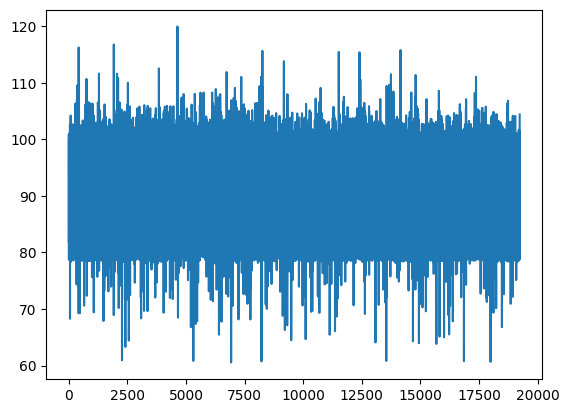

In [6]:
### 5.4 4. Remove alignments with coverage less than 60% 

df_60 = df[df["coverage"] >= 60] 
df_60 = df_60.reset_index()
print(df_60)

plt.plot(df_60.index,df_60["coverage"])
plt.show()  

In [7]:
### 5.4 4.verify that each query sequence is now aligned to at most one subject sequence.
i = 0
unique_list = []
for seq in df_60[0]:
    if seq in unique_list:
        print(str(seq))
        i+=1
        
    else:
        unique_list.append(seq)
# print(unique_list)

print(f"duplicate amounts = {i}")

duplicate amounts = 0


1614
2981.0
30
56.5


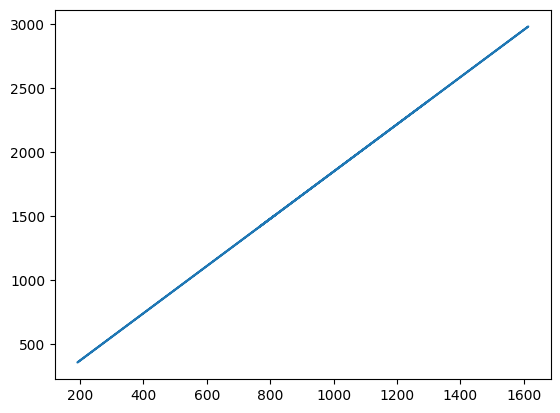

In [8]:
### 5.4 5. The bit score 𝑆′is derived from the raw score 𝑆 using the formula𝑆′ =𝜆𝑆 − ln 𝐾ln 2
# Can you find the values of 𝜆 and 𝐾 from your BLAST results? 
#Hint: Plot the bitscores against the raw scores.

plt.plot(df_60[2],df_60[3])

print (max(df[2]))
print (max(df[3]))

print (min(df[2]))
print (min(df[3]))

plt.plot () 
plt.show()  

### 5.4 5.

𝑆′ = (𝜆𝑆 − ln 𝐾) / ln 2

(lambda / ln2) * s - (ln(k)/ln(2))

Lamdba is line slope
k is when x = 0

-----------

Solve for line slope (lamdba)

*rise over run / ln(2) = lamdba*

change in rise  = 1614 - 30 =   1584
change in run   = 2981 - 56.5 = 2924.5

delta(y)/delta(x) = lamdba/ln(2)
(2924.5 / 1584) * ln(2) = **1.27974**

-----------

Solve for y-intercept (k)

Intercept (k) = 
0 = (1.27974 − ln 𝐾 )/ ln(2) 

**Solve for K** using wolframalpha 
[solve_for_k](https://www.wolframalpha.com/input?i=0+%3D+%281.27974+%E2%88%92+ln%28k%29+%29%2F+ln%282%29+)

𝐾 = **3.5957**
𝜆 = **1.27974**

y = ((1.27974*x) − ln(3.5957))/ ln(2) 

In [9]:
#5.5 Count VSG expression levels (4 points)

#1. Extract the unique VSG ids in your sample from your (filtered) BLAST results.
#this has already been done above, there are no duplicate VSG's (see unique list)

#2. For each unique VSG: count the number of sequences aliging to that VSG, and the
#average number of identical matches, mismatches, and gaps for its alignments. Hint:
#Using the split-apply-combine strategy, these numbers can be computed in one line of
#code.

#split apply combine
df_grouped = df_60.groupby(1)
calculation = df_grouped.agg({2:'count', 13:'mean', 12:'mean', 11:'mean'})
calculation.columns = ['Sequences count', 'Identical Matches Average', 'Gaps Average', 'Mismatches Average']
print(calculation)

#Reference to see order of cols:

#index 11 is mismtach
#index 12 is gaps
#index 13 is positve

#'6 qseqid sseqid score bitscore evalue qlen slen length sstart send nident mismatch gaps positive'

               Sequences count  Identical Matches Average  Gaps Average  \
1                                                                         
Tb05.5K5.330                39                1322.076923     30.717949   
Tb05.5K5.370                 1                1336.000000      5.000000   
Tb08.27P2.140               43                1578.790698     25.930233   
Tb08.27P2.220               19                1407.526316     30.473684   
Tb08.27P2.230               60                1073.333333     45.366667   
...                        ...                        ...           ...   
Tb927.9.580                147                1577.517007     28.639456   
Tb927.9.820                  2                1431.500000      4.500000   
Tb927.9.850                  2                 830.000000     30.500000   
Tb927.9.890                  4                1393.000000     18.750000   
Tb927.9.940                  1                1200.000000     23.000000   

               Mismatche

                Sequences count  Identical Matches Average  Gaps Average  \
1                                                                          
Tb08.27P2.380             11691                1117.816269     32.703276   
Tb927.4.5730               1245                1165.508434     23.269076   
Tb09.v4.0077               1186                1435.026981     25.858347   
Tb11.v5.0932                670                1448.358209     21.904478   
Tb09.v4.0088                590                1307.483051     17.677966   
Tb927.10.10                 552                1366.231884     19.166667   
Tb927.11.20300              398                1402.570352     26.540201   
Tb11.1451                   372                1065.032258     38.922043   
Tb927.9.300                 301                 994.478405     59.504983   
Tb10.v4.0065                233                1484.004292     22.373391   

                Mismatches Average  
1                                   
Tb08.27P2.380

([<matplotlib.patches.Wedge at 0x7f6739b58220>,
 [Text(-0.5841800189986275, 0.9320588529716155, 'Tb08.27P2.380'),
  Text(-0.24452183750370066, -1.0724780048951186, 'Tb927.4.5730'),
  Text(0.23884997938029096, -1.0737554131877682, 'Tb09.v4.0077'),
  Text(0.5816298023098163, -0.9336523834195702, 'Tb11.v5.0932'),
  Text(0.7788798249114837, -0.7767536407033163, 'Tb09.v4.0088'),
  Text(0.9225703175613682, -0.5990525929788773, 'Tb927.10.10'),
  Text(1.0119773428690015, -0.43116337683040196, 'Tb927.11.20300'),
  Text(1.062336562376239, -0.28537874524679563, 'Tb11.1451'),
  Text(1.0892706667843206, -0.15326256712988348, 'Tb927.9.300'),
  Text(1.0990083984411272, -0.04669625419526777, 'Tb10.v4.0065')])

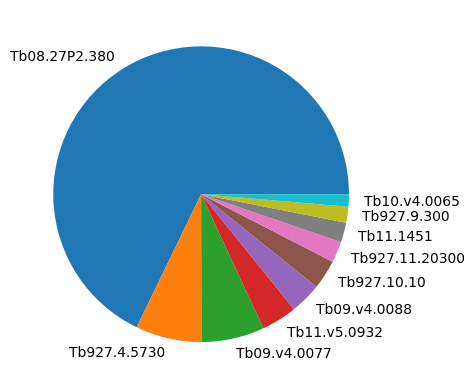

In [10]:
#5.5 3. Identify the 10 most abundant VSGs in your sample, visualize their relative expression
#levels in a pie chart, and compare your result against Figure 3 of the paper.

most_common = calculation.sort_values("Sequences count", ascending=False)
print(most_common[0:10])

labels = most_common[0:10].index
sizes = most_common[0:10]["Sequences count"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)


### 5.5 3. compare your result against Figure 3 of the paper.
Compared to fig.3 in the paper, it looks like this gene expression matches with somewhere between day 6-10 in terms of gene variation. 

### 5.5 4. Write a paragraph in your report that describes the figure and your interpretation of it.

The graph shows an example of variation within *Trypanosoma brucei* surface glycoprotein genes. There is one dominant "jacket", being Tb08.27.P2.380 (in blue). There are several other glycoprotein genes that are becoming more more abudant, such as Tb927.4.5730 (orange) and Tb09.v4.0077 (green), which may not have been noticed by the immune system, and can therefore increase in population size. (altough all of the parasites are part of the same population). If the immune system manages to make antibodies for the Tb08.27.P2.380 proteins, the other proteins (orange/green) will become the "new standard". However, i suspect this is a pretty early infection, as later stage infections tend to have a large variety of almost "co-dominating" surface glycoproteins:
ex: [pie_chart_journal]("https://journals.plos.org/plosntds/article/figure?id=10.1371/journal.pntd.0007262.g003") 





### 5.6 1. Find the relevant getorf command on the longread-application repository and adapt it to work on your input sample. Include the exact getorf command in your report.

```
getorf -sequence data/PacBio_VSG_filtered_reads_balbc_10_5.fasta -outseq outdata/PacBio_VSG_filtered_reads_10_5_ORFs.fasta -minsize 1200 -find 3 -reverse N
```

In [11]:
from Bio import SeqIO

In [12]:
### 5.6 2. Count the percentage of reads in your sample that result in a predicted ORF with a
#minimum size of 1200 nucleotides.

directory = f"{str(pwd)}/data/PacBio_VSG_filtered_reads_balbc_10_5.fasta"
fa = pyfastx.Fasta(directory)
print(f"length of original fasta = {len(fa)}")

directory = f"{str(pwd)}/outdata/PacBio_VSG_filtered_reads_10_5_ORFs.fasta"
size = len([len(rec) for rec in SeqIO.parse(f"{str(pwd)}/outdata/PacBio_VSG_filtered_reads_10_5_ORFs.fasta", "fasta")])
#From: https://stackoverflow.com/questions/31540845/parsing-fasta-file-with-biopython-to-count-number-sequence-reads-belonging-to-ea

print(f"length of orffasta file BIO = {size}")

percent = (size/len(fa))*100

print(f"""percent of reads in sample that resulted in a predicted ORF with a
minimum size of 1200 nucleotides = {round(percent,4)}""")



length of original fasta = 19240
length of orffasta file BIO = 2266
percent of reads in sample that resulted in a predicted ORF with a
minimum size of 1200 nucleotides = 11.7775


### 5.6 3 Which explanation was proposed in the paper for this low percentage?

**from the paper ->**
"""Surprisingly, only 33,234 reads (11%) resulted in predicted ORFs.
we hypothesize that the lack of identified ORFs was due to random sequencing errors rather than any systematic biases in the data, despite PacBio claiming an accuracy of more than 99% for reads with 15-fold coverage"""

That is a lot of random sequencing errors! But i suppose it could be possible? It matches well up with my number of 11.7775.